*   **First, low level tensor:** The infrastructure that underlies all modern machine learning. This translates to TensorFlow APIs:
    *   ***Tensors***
    *   ***Tensor Operations*** such as addition, *relu*, *matmul*
    *    ***Backpropagation***, a way to compute the gradient of mathematical expressions (handled in TensorFlow via the *GradientTape* object)
*   **Second, high-level deep learning concepts.** This translates to Keras APIs
    * ***Layers***, which are combined into a model
    * A ***loss function***, which defines the feedback signal used for learning
    * An ***optimizer***, which determines how learning proceeds
    *  ***Metrics*** to evaluate model performance, such as accuracy
    *  A ***training loop*** that performs mini-batch stochastic gradient descent

In [40]:
import tensorflow as tf

#Equivalent to np.ones(shape=(2, 1))
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [41]:
#Equivalent to np.zeros(shape=(2, 1))
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [42]:
#Tensor of random values drawn from a normal distribution
#with mean 0 and standard deviation 1. Equivalent to
#np.random.normal(size=(3, 1), loc=0., scale=1.).

x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[-2.6411436 ]
 [ 0.15531732]
 [-0.07932409]], shape=(3, 1), dtype=float32)


In [43]:
#Tensor of random values drawn from a uniform distribution between 0 and 1
#Equivalent to np.random.uniform(size=(3, 1), low=0., high=1.).
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.9013581 ]
 [0.5311327 ]
 [0.31150854]], shape=(3, 1), dtype=float32)


In [44]:
#NumPy arrays are assignable
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

x = tf.ones(shape=(2, 2))
#This will fail, as a tensor isn’t assignable
x[0, 0] = 0.

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

In [45]:
#TO ASSIGN VALUES TO A TENSOR: 

In [46]:
#Creating a TensorFlow variable
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.31036463],
       [-1.7853959 ],
       [-1.7010157 ]], dtype=float32)>


In [47]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [48]:
#Assigning a value to a subset of a TensorFlow variable
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [49]:
#assign_add -> += 1
#assign_sub -> -= 1

#Using assign_add
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [50]:
#MATH OPERATIONS

a = tf.ones((2, 2))
#Take the square.
b = tf.square(a)
#Take the square root.
c = tf.sqrt(a)
#Add two tensors (element-wise)
d = b + c
#Take the product of two tensors
e = tf.matmul(a, b)
#Multiply two tensors(element-wise)
e *= d

In [51]:
#GRADIENT TAPE

#Using the GradientTape
input_var = tf.Variable(initial_value=3.)

#the tensor is automatically watched since it is a trainable variable.
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [52]:
#Using GradientTape with constant tensor inputs

#Constant Tensor
input_const = tf.constant(3.)

#the tensor is not automatically watched since it is a non-trainable variable/constant
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [53]:
'''
If you measure the position of a falling apple along a vertical axis over time and 
find that it verifies position(time) = 4.9 * time ** 2,
what is its acceleration?

Solution:
Rate of change of position -> speed
Rate of change of speed -> acceleration
'''

#Using nested gradient tapes to compute second-order
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)

#We use the outer tape to compute the gradient of the gradient from the inner tape.
#Naturally, the answer is 4.9 * 2 = 9.8.
acceleration = outer_tape.gradient(speed, time)

acceleration

<tf.Tensor: shape=(), dtype=float32, numpy=9.8>

In [54]:
'''
Linear Classifier in TF

a given input point will be classified as “0” if its prediction value is below 0.5, 
and as “1” if it is above 0.5
'''

'\nLinear Classifier in TF\n\na given input point will be classified as “0” if its prediction value is below 0.5, \nand as “1” if it is above 0.5\n'

In [55]:
#Generating two classes of random points in a 2D
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

In [56]:
#Stacking the two classes into an array with shape

'''
negative_samples and positive_samples are both arrays with shape (1000, 2). 
stacking them into a single array with shape (2000, 2).
'''
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [57]:
#Generating the corresponding targets (0 and 1)

'''
generate the corresponding target labels, an array of zeros and ones of shape (2000, 1), 
where targets[i, 0] is 0 if inputs[i] belongs to class 0 (and inversely).
'''
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

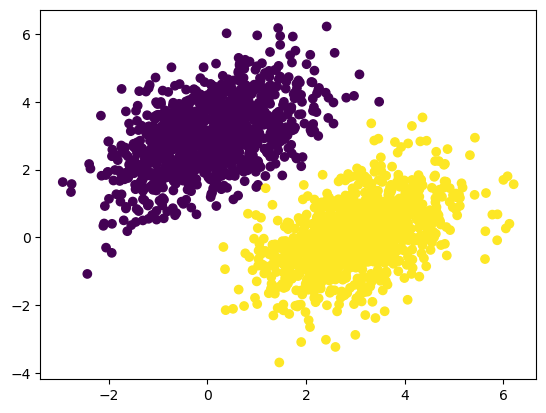

In [58]:
# Plotting the two point classes
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [59]:
#Creating the linear classifier variables

#Linear Classifier -> (prediction = W • input + b) // to minimize the square of the difference between predictions and the targets.

#prediction = [[w1], [w2]] • [x,y] + b = w1 * x + w2 * y + b

#The inputs will be 2D points.
input_dim = 2
#The output predictions will be a single score per sample.
#Close to 0 if the sample is predicted to be in class 0,
#and close to 1 if the sample is  predicted to be in class 1.
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

print("W.shape:",W.shape)
print("b.shape:",b.shape)

W.shape: (2, 1)
b.shape: (1,)


In [60]:
#forward pass function
def model(inputs):
    return tf.matmul(inputs, W) + b

In [61]:
#The mean squared error loss function
def square_loss(targets, predictions):
  #per_sample_losses will be a tensor with the same shape as
  #targets and predictions, containing per-sample loss scores.
    per_sample_losses = tf.square(targets - predictions)
  #We need to average these per-sample loss scores into a single scalar loss value.
  #This is what reduce_mean does.
    return tf.reduce_mean(per_sample_losses)

In [62]:
# training step function
learning_rate = 0.1

def training_step(inputs, targets):
  #Forward pass, inside a gradient tape scope
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
   #Retrieve the gradient of the loss with regard to weights.
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
  #Update the weights.
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [63]:
#The batch training loop
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 0.2682
Loss at step 1: 0.0946
Loss at step 2: 0.0830
Loss at step 3: 0.0773
Loss at step 4: 0.0728
Loss at step 5: 0.0688
Loss at step 6: 0.0651
Loss at step 7: 0.0618
Loss at step 8: 0.0588
Loss at step 9: 0.0560
Loss at step 10: 0.0534
Loss at step 11: 0.0511
Loss at step 12: 0.0490
Loss at step 13: 0.0470
Loss at step 14: 0.0452
Loss at step 15: 0.0436
Loss at step 16: 0.0421
Loss at step 17: 0.0408
Loss at step 18: 0.0395
Loss at step 19: 0.0384
Loss at step 20: 0.0373
Loss at step 21: 0.0364
Loss at step 22: 0.0355
Loss at step 23: 0.0347
Loss at step 24: 0.0340
Loss at step 25: 0.0333
Loss at step 26: 0.0327
Loss at step 27: 0.0322
Loss at step 28: 0.0316
Loss at step 29: 0.0312
Loss at step 30: 0.0308
Loss at step 31: 0.0304
Loss at step 32: 0.0300
Loss at step 33: 0.0297
Loss at step 34: 0.0294
Loss at step 35: 0.0291
Loss at step 36: 0.0289
Loss at step 37: 0.0286
Loss at step 38: 0.0284
Loss at step 39: 0.0282


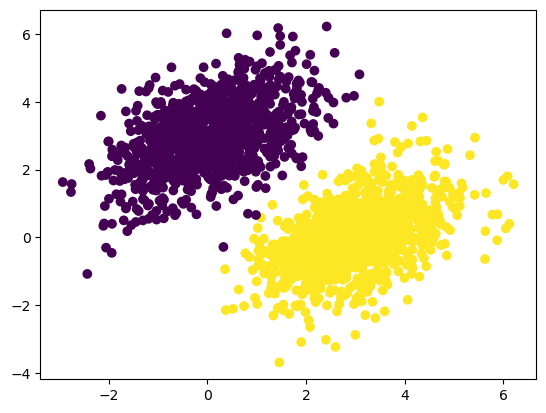

In [64]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

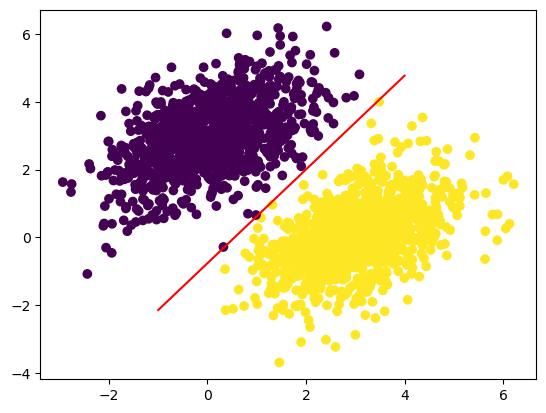

In [65]:
'''
prediction value for a given point [x, y] is simply 
prediction == [[w1], [w2]] • [x, y] + b == w1 * x + w2 * y + b. 

Therefore, class 0 is defined as w1 * x + w2 * y + b < 0.5, and class 1 is defined 
as w1 * x + w2 * y + b > 0.5. You will notice that what you are looking at is 
really the equation of a line in the 2D plane: w1 * x + w2 * y + b = 0.5. 

Above the line is class 1, and below the line is class 0. 
You may be used to seeing line equations in the format y = a * x + b; in the same format,
our line becomes y = - w1 / w2 * x + (0.5 - b) / w2.

'''


#Generate 100 regularly spaced numbers between –1 and 4, which we will use to plot our line
x = np.linspace(-1, 4, 100)
#This is our line’s equation.
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
#Plot our line ("-r" means “plot it as a red line”)
plt.plot(x, y, "-r")
#Plot our model’s predictions on the same plot.
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)